### Feed Forward Neural Networks in Pytorch

In [160]:
import torch
import torch.nn as nn
import torchvision.datasets as dsets
import torchvision.transforms as transforms
from torch.autograd import Variable
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [161]:
training_data = dsets.MNIST(root = './data', 
                            train = True, 
                            transform= transforms.ToTensor(), 
                            download = True)

In [162]:
test_data = dsets.MNIST(root = './data', 
                        train = False, 
                        transform= transforms.ToTensor())

In [163]:
len(training_data)

60000

In [164]:
image = training_data[0][0].numpy().reshape(28, 28)

In [165]:
batch_size = 100
nb_epoch = 15

In [166]:
trainloader = torch.utils.data.DataLoader(dataset=training_data, batch_size= batch_size, shuffle= True)
testloader = torch.utils.data.DataLoader(dataset=test_data, batch_size= batch_size, shuffle= False)

### Building the model

In [167]:
class FeedForwardNeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.sigmoid = nn.Sigmoid()
        self.fc2 = nn.Linear( hidden_dim, output_dim)
    def forward(self, x):
        out = self.fc1(x)
        out = self.sigmoid(out)
        out = self.fc2(out)
        return out
    

In [168]:
input_dim = 28*28
hidden_dim = 100
output_dim = 10

In [169]:
model = FeedForwardNeuralNetwork()

### Building the classifier

In [170]:
learning_rate = .001

In [171]:
criterion = nn.CrossEntropyLoss()

In [172]:
optimizer = torch.optim.Adam(model.parameters(), lr= learning_rate)

In [173]:
print(model.parameters)

<bound method Module.parameters of FeedForwardNeuralNetwork(
  (fc1): Linear(in_features=784, out_features=100, bias=True)
  (sigmoid): Sigmoid()
  (fc2): Linear(in_features=100, out_features=10, bias=True)
)>


In [174]:
num_iter = 0
loss_list = []
accuracy_list = []
iteration_list = []
for epoch in range(nb_epoch):
    for i, (images, labels) in enumerate(trainloader):
        
        images = Variable(images.view(-1, 28*28))
        labels = Variable(labels)
        
        #Clear all gradients
        optimizer.zero_grad()
        
        #Forward pass
        outputs = model(images)
        
        #Loss
        loss = criterion(outputs, labels)
        
        #Back Propagation
        loss.backward()
        
        #Update the parameters
        optimizer.step()
        
        num_iter+= 1
        
        if num_iter%100 == 0:
            correct = 0
            total = 0
            for (images, labels) in testloader:
                images = Variable(images.view(-1, 28*28))
                #Forward pass to get the logits
                outputs = model(images)
                
                #Get the predictions from the maximum value
                _, predicted = torch.max(outputs.data, 1)
                
                #Total no. of labels
                total+= labels.size(0)
                
                #Total corrected predictions
                
                correct+= (predicted == labels).sum()
                
            accuracy = correct/total
            loss_list.append(loss.data[0])
            accuracy_list.append(accuracy)
            iteration_list.append(num_iter)
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(num_iter, loss.data[0], accuracy))

Iteration: 100. Loss: 0.9899822473526001. Accuracy: 0.8228
Iteration: 200. Loss: 0.5476937890052795. Accuracy: 0.8794
Iteration: 300. Loss: 0.3893575370311737. Accuracy: 0.8985
Iteration: 400. Loss: 0.4072355031967163. Accuracy: 0.9081
Iteration: 500. Loss: 0.33666422963142395. Accuracy: 0.9137
Iteration: 600. Loss: 0.24549320340156555. Accuracy: 0.9159
Iteration: 700. Loss: 0.42495062947273254. Accuracy: 0.92
Iteration: 800. Loss: 0.22891515493392944. Accuracy: 0.9231
Iteration: 900. Loss: 0.27738675475120544. Accuracy: 0.9272
Iteration: 1000. Loss: 0.2647709250450134. Accuracy: 0.9293
Iteration: 1100. Loss: 0.1527186632156372. Accuracy: 0.9309
Iteration: 1200. Loss: 0.3250182867050171. Accuracy: 0.9336
Iteration: 1300. Loss: 0.19059185683727264. Accuracy: 0.9371
Iteration: 1400. Loss: 0.15002702176570892. Accuracy: 0.9379
Iteration: 1500. Loss: 0.2472442090511322. Accuracy: 0.9414
Iteration: 1600. Loss: 0.19617480039596558. Accuracy: 0.9411
Iteration: 1700. Loss: 0.22346366941928864.

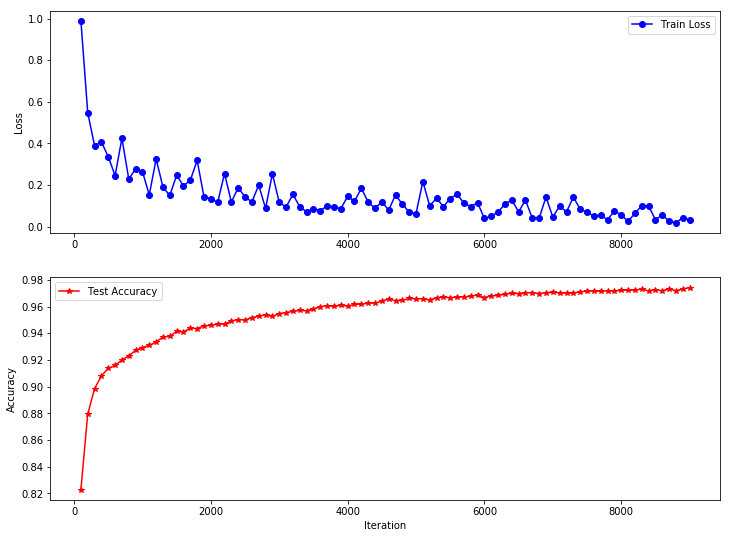

In [176]:
plt.figure(figsize= (12, 9))
plt.clf()
ax1 = plt.subplot(211)
plt.plot(iteration_list,loss_list, 'bo-', label = 'Train Loss')
plt.ylabel('Loss')
plt.legend(loc = 'best')
ax2 = plt.subplot(212)
plt.plot(iteration_list, accuracy_list, 'r*-', label = 'Test Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Iteration')
plt.legend(loc = 'best')